In [14]:
import random
import matplotlib.pyplot as plt
import time

In [15]:
class Search:
    def __init__(self, sequence_length= 2):
        self.sequence_length = sequence_length
        self.solution = [random.randint(0, 1) for _ in range(sequence_length)]
        self.fitness_data = []

    def solve_by_random_pattern(self):
        attempts = 0
        start_time = time.time()
        while True:
            pattern = [random.randint(0, 1) for _ in range(self.sequence_length)]
            self.fitness_data.append(self.fitness(pattern.copy()))
            attempts += 1
            if pattern == self.solution:
                time_duration = time.time() - start_time
                return attempts, time_duration

    def fitness(self, guessed_pattern):

        distance = sum(bit1 != bit2 for bit1, bit2 in zip(guessed_pattern, self.solution))
        

        max_fitness = len(self.solution) 
        fitness_value = max_fitness - distance
        
        return fitness_value
    
    def mutate_pattern(self):
        start_time = time.time()
        pattern = [random.randint(0, 1) for _ in range(self.sequence_length)]

        for attempts in range(1, 1001):  
            index_to_mutate = random.randint(0, self.sequence_length - 1)


            new_pattern = pattern.copy()
            new_pattern[index_to_mutate] = 1 - pattern[index_to_mutate]


            new_fitness = self.fitness(new_pattern)

            if new_fitness > self.fitness(pattern):
                pattern = new_pattern 
                if self.solution == new_pattern:
                    end_time = time.time()
                    time_duration = end_time - start_time
                    return new_pattern, attempts, time_duration  
    
        end_time = time.time()
        time_duration = end_time - start_time
        return new_pattern, attempts, time_duration
        
    def cross_over(self, parent1, parent2):
        child = []
        for i in range(self.sequence_length):
            if random.random() < 0.5:
                child.append(parent1[i])
            else:
                child.append(parent2[i])
        return child

    def mutate(self, pattern, mutation_rate=0.1):
        for i in range(len(pattern)):
            if random.random() < mutation_rate:
                pattern[i] = 1 - pattern[i]
        return pattern

    def generate_set_of_patterns(self, number_of_patterns=100):
        patterns = []
        for _ in range(number_of_patterns):
            pattern = [random.randint(0, 1) for _ in range(self.sequence_length)]
            patterns.append(pattern.copy())
        
        return patterns

    def evolve_population(self, current_population, mut_flag, mutation_rate=0.1):

        sorted_patterns = sorted(current_population, key= lambda pattern: self.fitness(pattern), reverse= True)
        

        num_patterns_to_select = int(len(sorted_patterns) * 0.3)
        

        selected_patterns = sorted_patterns[:num_patterns_to_select]


        num_patterns_to_mutate = len(sorted_patterns) - num_patterns_to_select

        if mut_flag:
            for _ in range(num_patterns_to_mutate):
                selected_patterns.append(self.mutate(sorted_patterns[random.randint(0, num_patterns_to_select - 1)].copy(), mutation_rate))
        else:
            for _ in range(num_patterns_to_mutate):
                selected_patterns.append(self.cross_over(sorted_patterns[random.randint(0, num_patterns_to_select - 1)], sorted_patterns[random.randint(0, num_patterns_to_select - 1)]))
        return selected_patterns


    def evaluate_and_evolve_population(self, max_generations = 100, mut_flag = True):
        attempts_data = []
        times_data = []
        fitness_data = []

        start_time = time.time()  
        current_population = self.generate_set_of_patterns()
        mutation_rate = 0.1
        best_fitness = -1  

        for attempts in range(max_generations):
            current_population = self.evolve_population(current_population, mut_flag, mutation_rate)
            best_pattern = current_population[0]
            current_fitness = self.fitness(best_pattern)

            # Check if fitness stagnates
            if current_fitness == best_fitness:
                break
            best_fitness = current_fitness

        end_time = time.time()  # Stop the timer
        time_duration = end_time - start_time  # Calculate the duration

        attempts_data.append(attempts)
        times_data.append(time_duration)
        fitness_data.append(best_fitness)

        return attempts_data, times_data, fitness_data




In [16]:

# Plotting for ex2 and ex3
def create_box_plots(bit_counts, attempts_results, times_results, fitness_results):
    _, ax = plt.subplots(3, 1, figsize=(10, 9))

    for bit_count in bit_counts:
        ax[0].boxplot(attempts_results[bit_count], positions=[bit_count], showfliers=False)
        ax[1].boxplot(times_results[bit_count], positions=[bit_count], showfliers=False)
        ax[2].boxplot(fitness_results[bit_count], positions=[bit_count], showfliers=False)

    ax[0].set_title("Attempts vs. Number of Bits")
    ax[0].set_xlabel("Number of Bits")
    ax[0].set_ylabel("Attempts")

    ax[1].set_title("Time vs. Number of Bits")
    ax[1].set_xlabel("Number of Bits")
    ax[1].set_ylabel("Time (seconds)")

    ax[2].set_title("Fitness vs. Number of Bits")
    ax[2].set_xlabel("Number of Bits")
    ax[2].set_ylabel("Fitness")

    plt.tight_layout()
    plt.show()



In [17]:
if __name__ == "__main__":
    random.seed(2137)

    bit_counts = [2, 4, 8, 12, 16]
    trials_amount = 30
    attempts_data = {bit_count: [] for bit_count in bit_counts}
    times_data = {bit_count: [] for bit_count in bit_counts}
    fitness_data = {bit_count: [] for bit_count in bit_counts}

    for _ in range(trials_amount):
        for bit in bit_counts:
            pattern = Search(sequence_length= bit)
            attempts, time_duration = pattern.solve_by_random_pattern()
            attempts_data[bit].append(attempts)
            times_data[bit].append(time_duration)
            fitness_data[bit].append(pattern.fitness(pattern.fitness_data))

    fig, ax = plt.subplots(2, 1, figsize=(10, 9))
    
    for bit in bit_counts:
        ax[0].boxplot(attempts_data[bit], positions=[bit], showfliers=False)
        ax[1].boxplot(times_data[bit], positions=[bit], showfliers=False)

    ax[0].set_title("Attempts vs. Number of Bits")
    ax[0].set_xlabel("Number of Bits")
    ax[0].set_ylabel("Attempts")

    ax[1].set_title("Time vs. Number of Bits")
    ax[1].set_xlabel("Number of Bits")
    ax[1].set_ylabel("Time (seconds)")


    plt.tight_layout()
    plt.show()

There is a huge gap between nuber of bits. The time for finding solution grows exponentially. Trying to find a solution for 32-bit sequence would take a tremendous amount of time. I tried to find a solution for 32-bit sequence but after an hour of finding I stopped. This way of finding a sloution is enough if the combination is not long. Otherwise the method is too random and takes way too much time. 

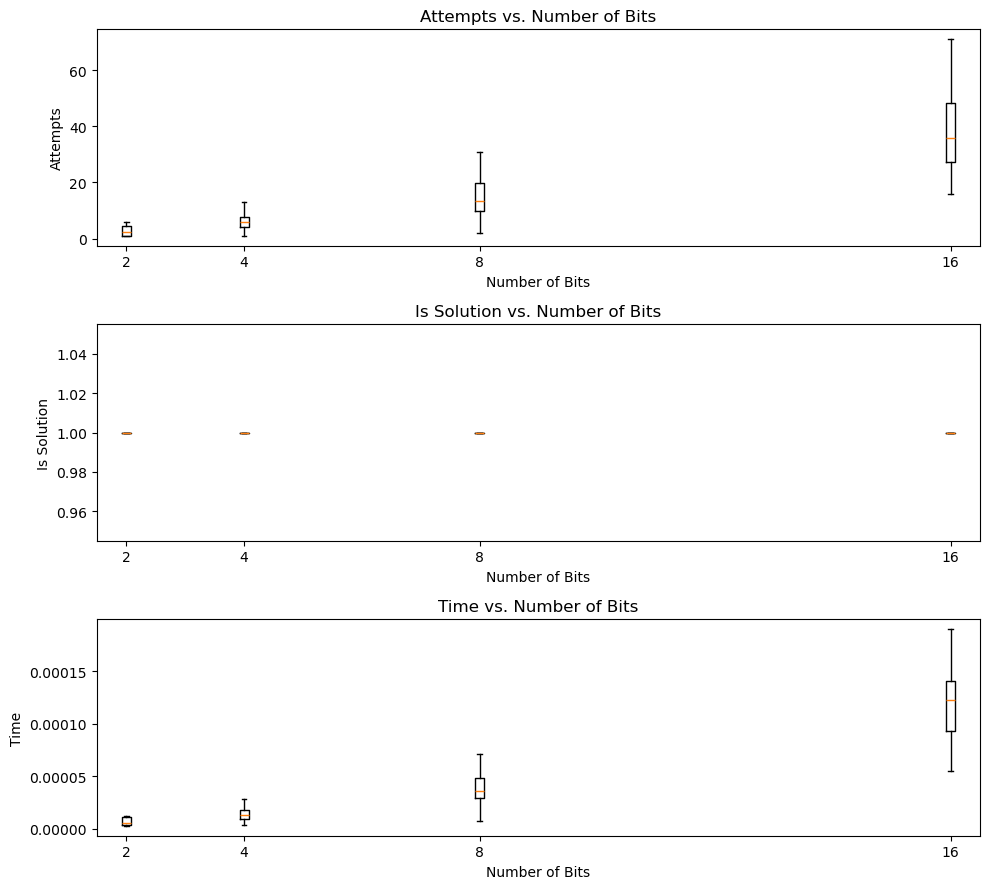

In [ ]:
# D)
attempts_data = {bit_count: [] for bit_count in bit_counts}
times_data = {bit_count: [] for bit_count in bit_counts}
is_solution = {bit_count: [] for bit_count in bit_counts}

for _ in range(trials_amount):
    for bit in bit_counts:
        pattern = Search(sequence_length= bit)
        result_pattern, attempts, time_duration = pattern.mutate_pattern()
        if result_pattern == pattern.solution:
            is_solution[bit].append(1)
        else:
            is_solution[bit].append(0)
        attempts_data[bit].append(attempts)
        times_data[bit].append(time_duration)

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

for bit in bit_counts:
    ax[0].boxplot(attempts_data[bit], positions=[bit], showfliers=False)
    ax[1].boxplot(is_solution[bit], positions=[bit], showfliers=False)
    ax[2].boxplot(times_data[bit], positions=[bit], showfliers=False)
    


ax[0].set_title("Attempts vs. Number of Bits")
ax[0].set_xlabel("Number of Bits")
ax[0].set_ylabel("Attempts")

ax[1].set_title("Is Solution vs. Number of Bits")
ax[1].set_xlabel("Number of Bits")
ax[1].set_ylabel("Is Solution")

ax[2].set_title("Time vs. Number of Bits")
ax[2].set_xlabel("Number of Bits")
ax[2].set_ylabel("Time")

plt.tight_layout()
plt.show()

The code, as currently implemented, does not guarantee convergence to the solution. The success of generating better patterns with a single mutation depends on the problem's characteristics and the specific genetic algorithm parameters. However, we have observed that this method yields more reliable results in a significantly shorter time with fewer attempts. Both the time and the number of attempts have notably decreased. This improvement allows us to work with longer bit sequences without the concern of extended execution times. The introduction of fitness calculation has significantly enhanced our ability to identify correct sequences.

Sometimes the algorythm does not give te solution right away and the code will to 1000 attempts and fail to find solution. 

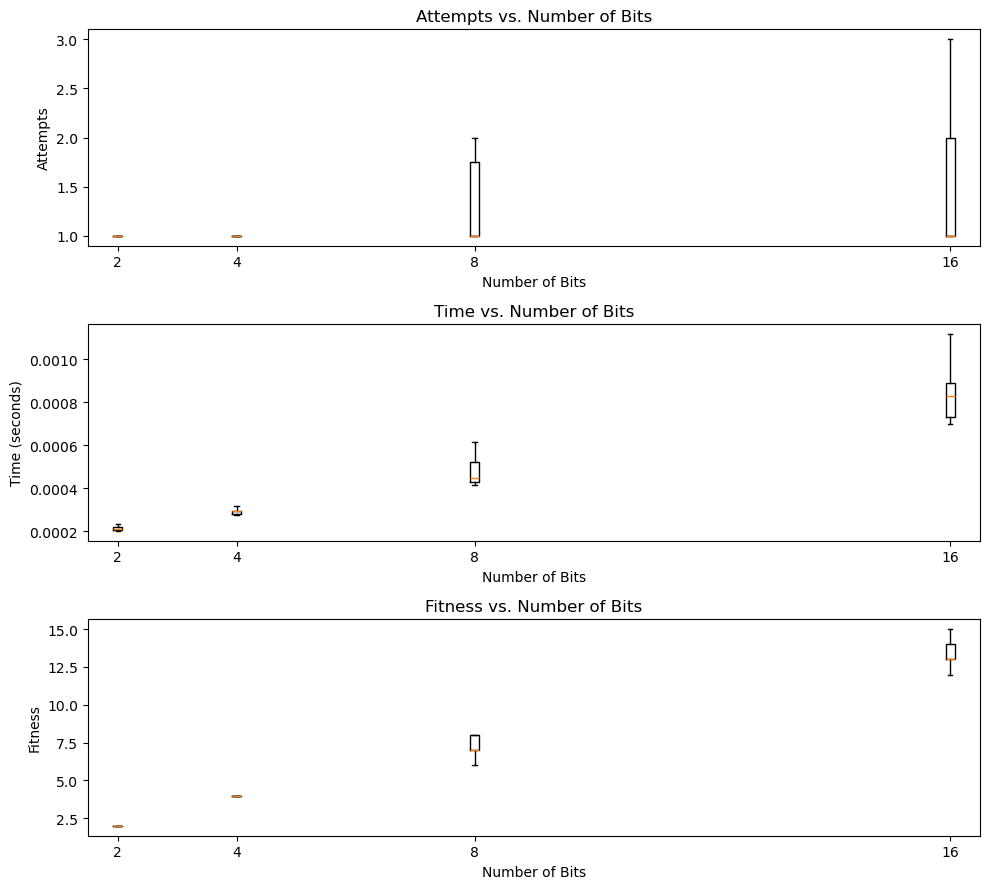

In [ ]:
# Exercise 2 and 3

bit_counts = [2, 4, 8, 16]
attempts_results = {bit_count: [] for bit_count in bit_counts}
times_results = {bit_count: [] for bit_count in bit_counts}
fitness_results = {bit_count: [] for bit_count in bit_counts}

attempts_results_ex3 = {bit_count: [] for bit_count in bit_counts}
times_results_ex3 = {bit_count: [] for bit_count in bit_counts}
fitness_results_ex3 = {bit_count: [] for bit_count in bit_counts}
for _ in range(trials_amount):
    for bit_count in bit_counts:

        pattern_mutate = Search(sequence_length= bit_count)
        pattern_evolve = Search(sequence_length= bit_count)

        attempts_data, times_data, fitness_data = pattern_mutate.evaluate_and_evolve_population(max_generations=100, mut_flag= True)
        attempts_data_ex3, times_data_ex3, fitness_data_ex3 = pattern_evolve.evaluate_and_evolve_population(max_generations=100, mut_flag= False)

        attempts_results[bit_count].extend(attempts_data)
        times_results[bit_count].extend(times_data)
        fitness_results[bit_count].extend(fitness_data)

        attempts_results_ex3[bit_count].extend(attempts_data_ex3)
        times_results_ex3[bit_count].extend(times_data_ex3)
        fitness_results_ex3[bit_count].extend(fitness_data_ex3)

# Create box plots for attempts, times, and fitness
create_box_plots(bit_counts, attempts_results, times_results, fitness_results)



Using a genetic algorithm with mutation has significantly improved our results in a much shorter time. By incorporating fitness scores, we can clearly observe substantial progress in finding solutions. It's evident that as the sequence length increases, the algorithm requires more time to discover a correct solution. However, we can confidently increase the number of bits in the sequence without concerns about extended execution times. The algorithm remains capable of finding a solution within a reasonable timeframe, especially when compared to other methods.

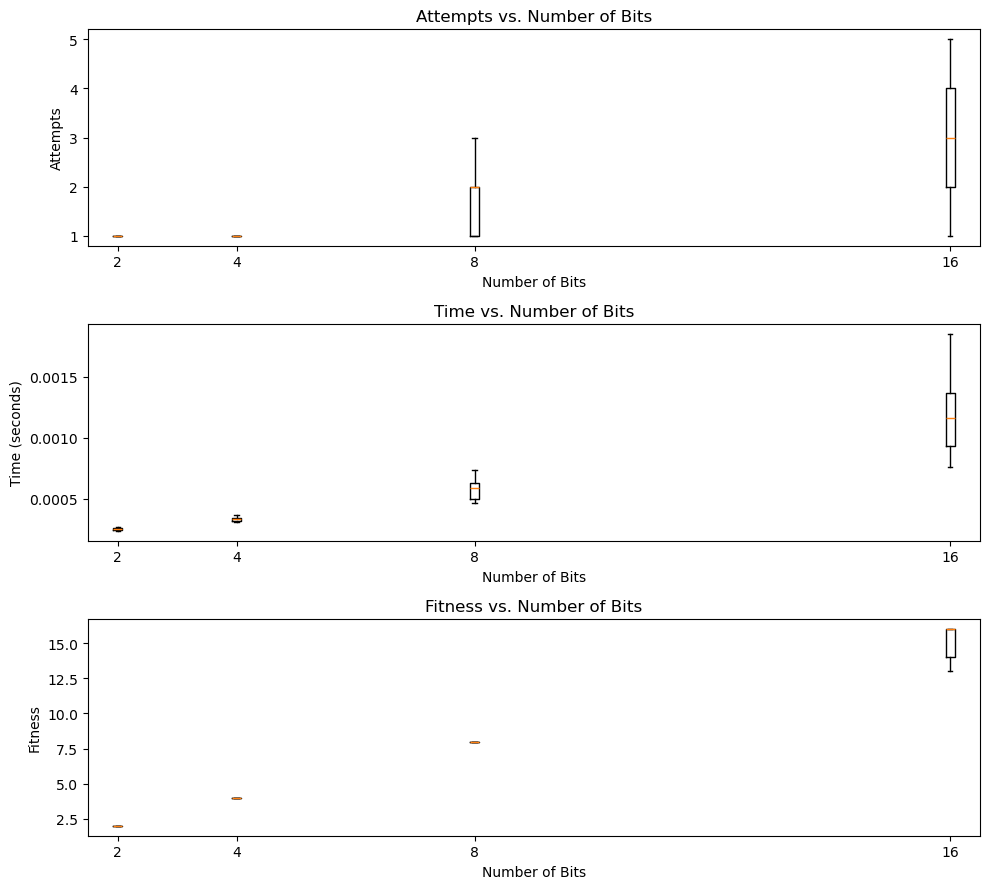

In [ ]:
create_box_plots(bit_counts, attempts_results_ex3, times_results_ex3, fitness_results_ex3)

Results for Exercise 3 - Using Cross-Over Instead of Mutation: 
The algorithm continues to demonstrate its efficiency, providing results without excessive time or resource requirements. Although the mutation-based algorithm appears to perform slightly better than the one with cross-over, the difference is not significant. Both approaches deliver quick and reliable results.


In case of an unknown size of a pattern we are looking for the code would have to look little different. The evaluation function would also have to consider the difference in size of both pattern we currently have and the solution. In order to find solution I'd suggest increasing a size of the current pattern if the fitness would stagnate. 

In case of mutation function, the change could work the same but i would suggest changing the amount of increasing pattern size if the algorythm stagnates. The same with crossover. 


In situations where we are attempting to find solutions for decimal numbers, the task becomes notably more challenging. However, the fundamental principles remain consistent. Instead of having two options for each element in the sequence, we now have ten. Modifying the random number generator to accommodate this larger range is a straightforward adjustment. When it comes to genetic algorithms, the complexity increases as we transition from mutating between two numbers to ten.

An alternative approach involves representing decimal numbers in binary form. This transformation significantly extends the length of the sequence. Surprisingly, this alteration doesn't necessitate any changes to the existing code. In this binary representation, a sequence of two single digits in decimal becomes as complex as seven digits in binary, without even accounting for the sequence's length. In that moment we go back with a problem of unknown lenght of the sequence. 

To adapt the robot-maze problem's evaluation function to the genetic algorithm's approach, we need to make several changes. The function should now reward efficient exits from the maze while penalizing inefficient moves.

The modified evaluation function should also embrace the genetic algorithm's sequencing concept. It will reward the agent for correctly following a sequence of actions leading to the exit and penalize deviations. Sequence length should be considered, favoring shorter ones. Dynamic rewards based on the robot's state in the maze may be introduced. These adjustments will align the evaluation function with the genetic algorithm's focus on finding optimal sequences and improving the search process's efficiency.